## Classification Model with keras

Importing Keras and Packages

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

Loading the MNIST data

In [5]:
from keras.datasets import mnist

In [6]:
# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

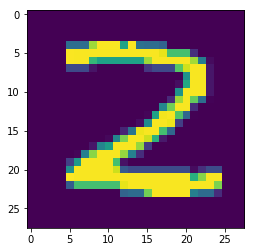

In [14]:
# Let's visualize the 221th image from training dataset
plt.imshow(X_train[220])

<br></br>
### Flattening images into one dimentional vector from size 60,000X(28 X 28) to 60,000X(784)

In [15]:
num_pixels = X_train.shape[1] * X_train.shape[2] # finding size of 1D vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [16]:
# normalizing inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [21]:
# y_train
y_train[0:10,]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [23]:
# dividing our target variable into categorial variable
y_train =  to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape

(60000, 10)

In [24]:
num_classes = 10

## Building a Neural Network

In [26]:
model = Sequential()
model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train and Test the network

In [28]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 198s - loss: 0.1900 - acc: 0.9427 - val_loss: 0.1032 - val_acc: 0.9697
Epoch 2/10
 - 207s - loss: 0.0810 - acc: 0.9748 - val_loss: 0.0846 - val_acc: 0.9725
Epoch 3/10
 - 196s - loss: 0.0551 - acc: 0.9823 - val_loss: 0.0738 - val_acc: 0.9771
Epoch 4/10
 - 191s - loss: 0.0395 - acc: 0.9871 - val_loss: 0.0698 - val_acc: 0.9815
Epoch 5/10
 - 155s - loss: 0.0339 - acc: 0.9888 - val_loss: 0.0878 - val_acc: 0.9760
Epoch 6/10
 - 152s - loss: 0.0270 - acc: 0.9912 - val_loss: 0.0903 - val_acc: 0.9760
Epoch 7/10
 - 161s - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0915 - val_acc: 0.9779
Epoch 8/10
 - 155s - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0729 - val_acc: 0.9819
Epoch 9/10
 - 158s - loss: 0.0152 - acc: 0.9953 - val_loss: 0.0896 - val_acc: 0.9811
Epoch 10/10
 - 196s - loss: 0.0166 - acc: 0.9945 - val_loss: 0.1048 - val_acc: 0.9787


In [29]:
scores = model.evaluate(X_test, y_test, verbose = 1)

10000/10000 [==============================] - 7s 713us/step


In [30]:
# printing the accuracy and the correspoding error 

print('Accuracy: {}\nError: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9787
Error: 0.021299999999999986


In [31]:
# saving our model after training
model.save('classification_model.h5')